# Week 04

## Audio Processing and Analysis

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/audio_utils.py

^ this is a helper cell, downloaded the audio_utils.py file. if you run the cell again you will get another copy. best to delete extras if you run multiple times. 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave

from IPython.display import Audio

from audio_utils import wav_to_list, list_to_wav
from audio_utils import fft, stft, cluster_fft_freqs

## Before we start

`enumerate(list)` ...

In Python, this is how we iterate over a list and get both the index AND the content for elements of the list.

In [3]:
my_list = [1, 4, 6, 1, 23, 66, 6, 17]

for val in my_list:
  print(val)

1
4
6
1
23
66
6
17


In [4]:
for idx in range(len(my_list)):
  val = my_list[idx]
  print(idx, val)

0 1
1 4
2 6
3 1
4 23
5 66
6 6
7 17


In [5]:
# enumerates your list, gives a number to each value in the list. does the above quicker
for idx, val in enumerate(my_list):
  print(idx, val)

0 1
1 4
2 6
3 1
4 23
5 66
6 6
7 17


## Manipulating Audio

Once we have a list of samples we can process, analyze and manipulate the audio by performing list operations and simple arithmetics.

<img src="./imgs/audio-02.jpg" width="720px">

### Change volume

To change the volume of an audio file all we have to do is multiply its samples by a constant.

If the constant is greater than $1$ it will get louder, if it's between $0$ and $1$ it will get softer.

<img src="./imgs/audio-04.jpg" width="720px">

### Process the samples array to makes the audio softer and then louder
Check results visually and by listening to the audio

In [ ]:
sound_file_path = "./data/air-horn.wav"
my_samples = wav_to_list(sound_file_path)

plt.plot(my_samples)
plt.ylim([-20000, 20000])
plt.show()
display(Audio(sound_file_path))

audio player cell can take up a lot of space, after testing you can close cell output by clicking on three dots and saying clear cell output

In [ ]:
# TODO: make samples softer

softer_samples = [s/2 for s in my_samples]

plt.plot(softer_samples)
plt.ylim([-20000, 20000])
plt.show()

In [ ]:
# TODO: make samples louder

louder_samples = [2 * s for s in my_samples]
plt.plot(louder_samples)
plt.ylim([-20000, 20000])
plt.show()

### NOTE: about playing modified samples

The `display(Audio(samples))` function tries to be smart when it plays back our samples and automatically adjusts samples that are too loud or too soft.

To hear the difference in making samples softer/louder we have to save the file and then play from the file.

### Saving our samples

We can use the `list_to_wav()` function to save a sequence of samples as a mono `.wav` file:

```py
list_to_wav(sum_samples, "out.wav")
```

### Save the modified sample lists to hear them louder and softer

In [ ]:
# TODO: save list of softer samples as a wav file
list_to_wav(softer_samples, "./softer.wav")

# TODO: play from file
display(Audio("./softer.wav"))

In [ ]:
# TODO: save list of louder samples as a wav file
list_to_wav(louder_samples, "./louder.wav")

# TODO: play from file
display(Audio("./louder.wav"))

### Change speed

If we just duplicate each sample in our sequence, while keeping the sample rate the same, we'll end up with an audio file that is twice as long as the original.

<img src="./imgs/audio-05.jpg" width="720px">

And, conversely, if we remove every other sample, we'll get an audio signal that is half of the original length.

### Process the samples array to makes the audio shorter and longer
Check results visually and by listening to the audio

In [ ]:
sound_file_path = "./data/horn.wav"
my_samples = wav_to_list(sound_file_path)

plt.plot(my_samples)
plt.show()

display(Audio(my_samples, rate=44100))
print(len(my_samples), "samples")

In [ ]:
# TODO: double the samples to hear the effects
double_samples = []

for idx, val in enumerate(my_samples):
  # TODO: this
  double_samples.append(0)

plt.plot(double_samples)
plt.show()

display(Audio(double_samples, rate=44100))
print(len(double_samples), "samples")

In [ ]:
# TODO: half the samples to hear the effects
half_samples = []

for idx, val in enumerate(my_samples):
  # TODO: this
  # for loop will give us index and value, want to grab every other sample. so that is why enumerate is helpful. 
  # check if index is odd and do action accordingly  
  half_samples.append(0)

plt.plot(half_samples)
plt.show()

display(Audio(half_samples, rate=44100))
print(len(half_samples), "samples")

### Reverse

Flipping the order of the samples will make the audio sound backwards.

<img src="./imgs/audio-06.jpg" width="720px">

The following cell reverses the samples

In [7]:
sound_file_path = "./data/two-bits.wav"
my_samples = wav_to_list(sound_file_path)

rev_samples = list(reversed(my_samples))

And we can check the effect running the cell below

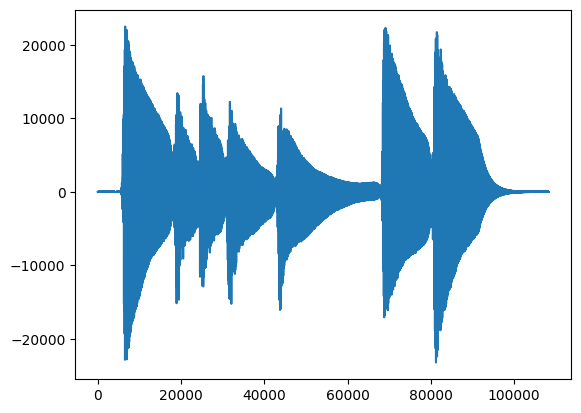

[0, -1, 2, -2, 2, -2, 4, -5, 3, -1, -3, 6, -5, 4, -3, 1]


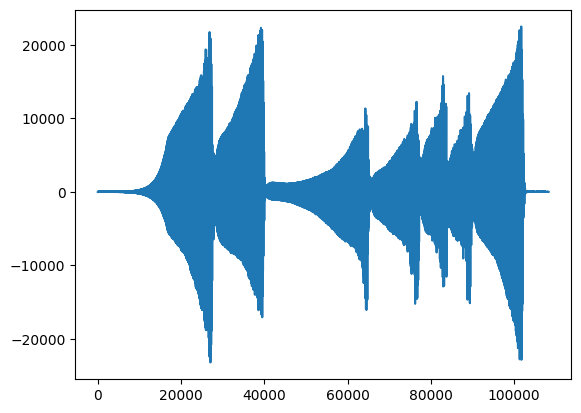

[1, -3, 4, -5, 6, -3, -1, 3, -5, 4, -2, 2, -2, 2, -1, 0]


In [8]:
plt.plot(my_samples)
plt.show()
display(Audio(sound_file_path))
print(my_samples[:16])

plt.plot(rev_samples)
plt.show()
display(Audio(rev_samples, rate=44100))
print(rev_samples[-16:])

sometimes having reverse helps train a model
this is also good to start realizing audio is just a list of samples


### Splicing

We can create longer sounds by adding existing sample lists one after the other.

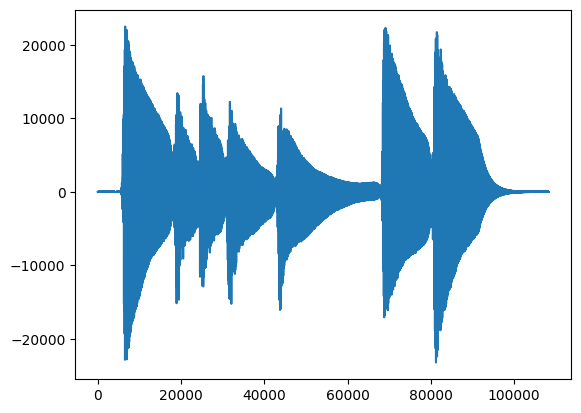

108288 samples


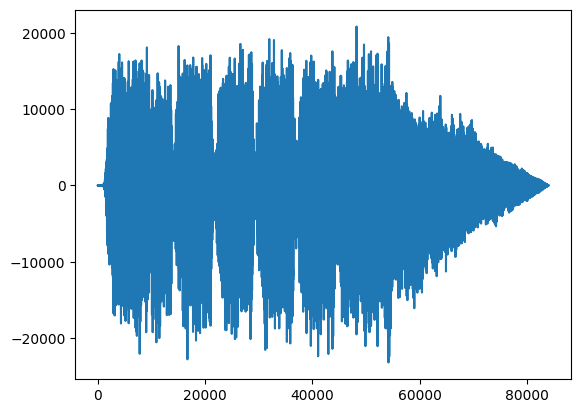

84039 samples


In [11]:
two_bit_file_path = "./data/two-bits.wav"
two_bit_samples = wav_to_list(two_bit_file_path)

air_horn_file_path = "./data/air-horn.wav"
air_horn_samples = wav_to_list(air_horn_file_path)

plt.plot(two_bit_samples)
plt.show()
display(Audio(two_bit_file_path))
print(len(two_bit_samples), "samples")

plt.plot(air_horn_samples)
plt.show()
display(Audio(air_horn_file_path))
print(len(air_horn_samples), "samples")


This sum places all of the samples from the second audio right after the first

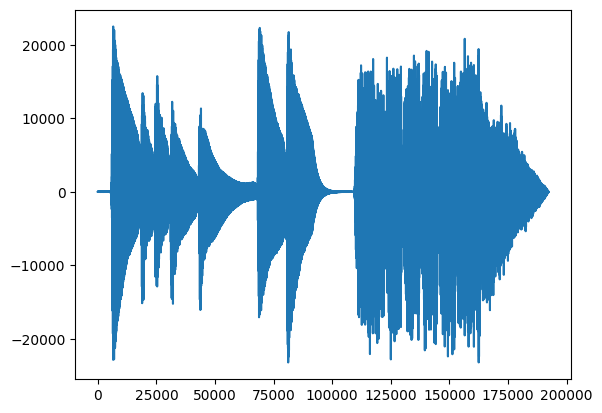

192327 samples


In [12]:
sum_samples = two_bit_samples + air_horn_samples

plt.plot(sum_samples)
plt.show()
display(Audio(sum_samples, rate=44100))
print(len(sum_samples), "samples")

### Splicing with Slicing

We can also use slicing to select parts of the two sounds before adding them.

This sum keeps $60\%$ of the first audio and then starts the second audio:

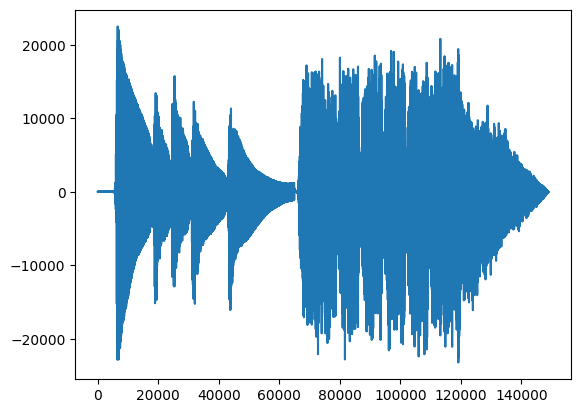

149011 samples


In [13]:
end_idx = int(0.6 * len(two_bit_samples))

sum_samples = two_bit_samples[:end_idx] + air_horn_samples

plt.plot(sum_samples)
plt.show()
display(Audio(sum_samples, rate=44100))
print(len(sum_samples), "samples")

## Audio Analysis

### Time-Domain

There are a couple of simple analysis and transformations that we can perform on our samples to extract information about them and our audio signal as a whole.

These are sometimes called _time-domain features_ because they are concerned with how an audio signal changes over time.

Since the information we want to extract from the samples will hopefully tell us something about the audio's characteristic in terms of loudness or pitch, it's useful if we work with chunks of audio that are long enough for us to notice these properties.

What this means is that we will further split our list of samples into smaller lists that contain about $10$ - $50$ milliseconds of audio.

This process is sometimes called _windowing_ or _blocking_, and the result is a list of lists, where the outer list gives us a list of windows or blocks and the internal lists are just regular lists of samples:

<img src="./imgs/window-00.jpg" height="250px">

<img src="./imgs/window-01.jpg" height="250px">

### Let's open up an audio file and split it into lists of 1024 samples

In [15]:
file_path = "./data/two-bits.wav"
all_samples = wav_to_list(file_path)

# variable for number of samples per window, or, the window length
WLEN = 1024

# first sample index for each window: [ 0, 1024, 2048, 3072, 4096, ... ]
wx = range(0, len(all_samples), WLEN)

samples_win = []
for s in wx:
  samples_win.append(all_samples[s : s + WLEN])

In [16]:
len(all_samples), len(samples_win)

(108288, 106)

In [18]:
all_samples[0]

0

In [20]:
samples_win[0]
# this is a list of lists, 
# where before there were 1000s of points, 
# first index in samples_win is a set of samples in the original file. 
# has the same number of samples but it is now separated into groups 
# (so that there are actually less indexes in the list that is samples_win)

[0,
 -1,
 2,
 -2,
 2,
 -2,
 4,
 -5,
 3,
 -1,
 -3,
 6,
 -5,
 4,
 -3,
 1,
 -2,
 4,
 -3,
 3,
 -2,
 -3,
 9,
 -11,
 10,
 -7,
 4,
 -4,
 5,
 -6,
 9,
 -9,
 3,
 3,
 -6,
 10,
 -11,
 7,
 -3,
 3,
 -3,
 6,
 -10,
 10,
 -6,
 3,
 0,
 -3,
 2,
 2,
 -5,
 5,
 -1,
 -6,
 10,
 -11,
 8,
 -1,
 -3,
 2,
 0,
 -4,
 8,
 -5,
 0,
 3,
 -7,
 10,
 -6,
 0,
 3,
 -3,
 0,
 3,
 -3,
 0,
 2,
 -1,
 -5,
 11,
 -12,
 9,
 -4,
 -3,
 6,
 -4,
 5,
 -7,
 9,
 -10,
 8,
 -2,
 -5,
 11,
 -11,
 9,
 -9,
 8,
 -6,
 4,
 -3,
 3,
 -1,
 -2,
 3,
 -4,
 2,
 4,
 -8,
 7,
 -2,
 -5,
 9,
 -10,
 11,
 -11,
 11,
 -11,
 9,
 -5,
 2,
 1,
 -3,
 2,
 1,
 -4,
 3,
 -1,
 0,
 1,
 -1,
 -3,
 6,
 -6,
 4,
 -1,
 -2,
 4,
 -4,
 2,
 1,
 -2,
 3,
 -3,
 3,
 0,
 -3,
 6,
 -9,
 12,
 -13,
 11,
 -8,
 4,
 -1,
 -2,
 4,
 -5,
 7,
 -8,
 6,
 -7,
 11,
 -8,
 5,
 -5,
 1,
 3,
 -3,
 4,
 -4,
 -1,
 6,
 -7,
 5,
 -5,
 4,
 -2,
 3,
 -3,
 0,
 0,
 -1,
 5,
 -8,
 12,
 -16,
 14,
 -12,
 10,
 -7,
 4,
 -1,
 -3,
 5,
 -6,
 6,
 -6,
 9,
 -11,
 10,
 -9,
 8,
 -8,
 9,
 -11,
 13,
 -14,
 11,
 -8,
 5,
 1,
 -4,
 1,
 -1,


### Root Mean Square Energy

Now that we have our list split into chunks/blocks/windows, we can calculate some properties for each of these windows.

The first will be a measurement of loudness called the root mean square energy. This is calculated by taking the square root of the arithmetic mean of the squares of our sample values, or:

$ rms = \sqrt{\frac{1}{n} ({s_0}^2 + {s_1}^2 + {s_2}^2 + ... + {s_{n-1}^2})}$

<img src="./imgs/window-02.jpg" height="250px">

### Let's write a function that implements this

It will receive a list of samples and return their rms value.

First we can calculate the squares of all the samples with a comprehension, then find the average value of this array $\displaystyle \left(\frac{sum}{length}\right)$, and finally take the square root.

Remember that in python we can take the square root of a number $x$ by raising it to $0.5$, like `x ** 0.5`.

notes from class - we have to do all the squaring bc of the negative values ( can't just take an average)

In [21]:
# TODO: implement rms - root mean square

def rms(samples):
    #goal to square every samples
    sq_samples = [s**2 for s in samples]
    # add all things that have been squared and divide by number of samples
    avg_sqs = sum(sq_samples) / len(sq_samples)
    #return square root
    return avg_sqs**0.5


### Now, we'll use that to compute the rms for each of our windows

In [22]:
# TODO: compute the rms of each window in samples_win

samples_rms = [rms(samples) for samples in samples_win]


If we compare the length of our two arrays (`all_samples` and `samples_rms`) and also plot their contents, we'll see that even though one of them is 1000 times smaller, it's still able to represent enough information about how the loudness of the sound changes over time.

This is good because if we wanted to compare it to other sounds to find similarities, instead of comparing $100,000$ values we can now compare $100$.

We'll see more about this in the homework.

108288 106


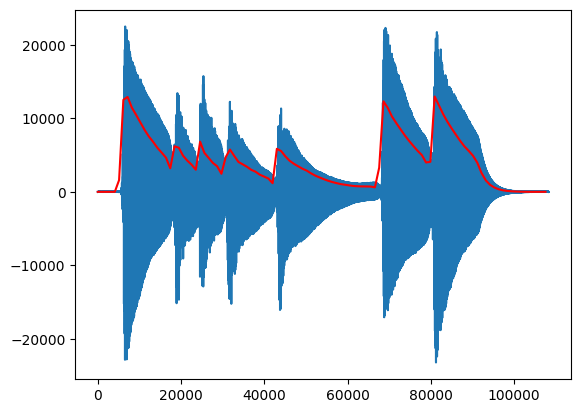

In [23]:
print(len(all_samples), len(samples_rms))

plt.plot(all_samples)
plt.plot(wx, samples_rms, 'r')
plt.show()

### Zero-Crossing Rate

Another time-domain feature we can extract from our samples is their zero-crossing rate, or, how frequently the wave change from a positive value to a negative one.

<img src="./imgs/window-04.jpg" height="250px">

This can give us some idea about the frequency of our sound at different points in time because higher tones, with higher frequencies, tend to have higher zero-crossing rates.

The formula for computing the zero-crossing rate for a window of samples is:

$\displaystyle zcr = \frac{1}{2} \sum{\left|{\frac{|s_n|}{s_n} - \frac{|s_{n+1}|}{s_{n+1}}} \right|}$

This looks more complicated than it should.

The first thing we do is determine the sign of each sample. That's what the $\displaystyle \frac{|s_n|}{s_n}$ calculation does. It gives us a $+1$ if our sample is a positive number, $-1$ if it's a negative number and $0$ if the sample is $0$.

Then we look at pairs of consecutive samples and subtract their signs. We'll get a $-2$ if the signal goes from a negative number to a positive number and a $+2$ if it goes from positive to negative.

Finally, we sum up the absolute value of all of these $+2$ and $-2$ values and divide by $2$.

### Let's write a function that implements this

It will receive a list of samples and return the number of times the values change sign.

We'll also implement a separate `sign()` function to do the $\displaystyle \frac{|s_n|}{s_n}$ calculation with a little bit of filtering to avoid counting zero-cross rates for noisy and quiet parts of of audio.

In [ ]:
def sign(sample):
  if abs(sample) < 256:
    return 0
  else:
    return (abs(sample) / sample)

def zcr(samples):
  signs = [sign(s) for s in samples]

  twos = []
  for i in range(0, len(samples) - 1):
    sign_diff = signs[i] - signs[i+1]
    twos.append(abs(sign_diff))

  return (sum(twos) / 2)

### Now, we can use that to compute the zero-crossing rate for each of our windows

We can then also plot this result overlaid with the original wave and rms plots.

We might have to scale the `zcr()` results to make them comparable in scale to the original sample values.

In [ ]:
# TODO: compute the zcr of each window in samples_win 
# and plot the results along with the original wave and rms plots


### Repeat the time-domain feature extraction for another audio file

Open the file and get a list of samples, then do the windowing, the rms analysis and the zero-crossing rate calculation, and plot the results.

How do they compare to the `two-bits.wav` file ?

In [ ]:
# TODO: repeat analysis with different file
file_path = ""

all_samples = []

# first index of each window
wx = range(0, len(all_samples), WLEN)

samples_win = []
samples_rms = []
samples_zcr = []

# TODO: plots

### Frequency-Domain

We saw that the zero-crossing rate can sometimes tell us something about the pitch of a sound, but there's a better way to get frequency information from a sound signal.

There's a mathematical operation called a Fourier Transform that we can use to decompose our audio signal into simpler, basic waves of pure frequencies.

A complex audio wave made up of many frequencies:<br>
<img src="./imgs/fft-00.jpg" width="600px">

Gets separated into sine waves of single frequencies:<br>
<img src="./imgs/fft-01.jpg" width="600px">

This is useful because it can tell us which frequencies are present in our audio at any given time.

The math is a bit beyond our scope here, but luckily there are many packages and libraries that implement the  Fast Fourier Transform algorithm for extracting frequency information from audio waves, and its inverse, the `IFFT`, which is used for transforming frequency information back into sound waves.

### Let's open up a file, read its samples and run the fft()

In [ ]:
file_path = "./data/two-bits.wav"
all_samples = wav_to_list(file_path)

fft_energy, fft_freqs = fft(all_samples)

Running the `fft()` on an array of samples returns two lists: one with the amount of energy in different frequency bands, and the other with the specific values of the frequency bands (in units of Hertz).

We can then plot these to get information about the frequencies present in our sound.

In [ ]:
plt.plot(all_samples)
plt.show()

plt.plot(fft_freqs, fft_energy)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Energy')
plt.show()

Let's zoom in on the x-axis since it doesn't look like we have any frequencies less than $200$ Hz or greater than $1000$ Hz.

In [ ]:
plt.plot(fft_freqs, fft_energy)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Energy')
plt.xlim(200, 1000)
plt.show()

We can combine the two arrays that we got from `fft()` and sort them to get a list of the more prevalent frequencies.

First we'll combine them using zip, then sort by the fft energy values by using a key function.

We'll also round the frequencies to the nearest Hz just to make it easier to analyze the results.

In [ ]:
fft_energy_freq = [(round(f), e) for f,e in zip(fft_freqs, fft_energy)]

def byFft(A):
  return A[1]

fft_sorted = sorted(fft_energy_freq, key=byFft, reverse=True)

If we just look at the first 5 elements of the resulting array we'll see that they all have pretty similar frequencies.

Must be a very strong component of the original signal.

In [ ]:
fft_sorted[:5]

### Other frequencies ?

Take a look at other parts of the list and see which additional frequencies are dominant in our audio signal.

In [ ]:
# TODO: Look into list for other frequencies


We can plot the top-100 strongest frequencies in a scatter plot to see how these (energy, frequency) pairs are distributed.

In [ ]:
top_freqs = [x[0] for x in fft_sorted[:100]]
top_energy = [x[1] for x in fft_sorted[:100]]
plt.scatter(top_freqs, top_energy)
plt.show()

And if we only plot the frequencies along a diagonal, we can see some pretty well-defined frequency clusters.

In [ ]:
plt.scatter(top_freqs, top_freqs)
plt.show()

### Clustering

We'll see a lot more about this in a few weeks, but this is a perfect situation where we can use a Machine Learning technique called clustering to "learn" how to combine similar frequencies into representative groups.

The `cluster_fft_freqs()` function takes a list of fft frequency values and another list of the corresponding energy at each of those frequencies, and then calculates frequency cluster groups.

There are additional optional parameters that we can use to tune this function.

The `top` parameter can be used to determine how many of the top frequencies we want to use to do the clustering. The default is $50$, but since we looked at the top-100 strongest frequencies a few cells above, we can use $100$ for this parameter.

Another parameter, `clusters`, can be used to specify how many groups we want to combine our data into. The default is $6$. From looking at the graphs above, maybe we can try $7$.

In [ ]:
cluster_fft_freqs(fft_freqs, fft_energy, top=100, clusters=7)

### Repeat the `FFT` analysis and get the strongest $n$ frequencies in the `horn` audio file.

For the horn file $n$ might be different than 7. Once we start plotting we'll see how many clusters we want.

In [ ]:
# TODO: repeat FFT on horn.wav

### STFT

We can run a windowed version of the `FFT` on our samples to see which frequencies are present at different times. This is called a Short-Time Fourier Transform (`STFT`) because instead of running on the entire audio at once, it runs the `FFT` on small chunks/windows of audio.

Running the `stft()` on an array of samples returns three lists: one with the amount of energy in different frequency bands, at specific times, another with the specific value for the frequency bands, and a third with the specific times when the `FFT` was performed (the chunk/window time).

We can plot these to get information about the frequencies present in our sound at different times.

In [ ]:
fft_res, fft_freqs, fft_times = stft(all_samples)

plt.pcolormesh(fft_times, fft_freqs, np.array(fft_res).T)
plt.show()

We can see some frequency activity on the lower frequencies.

Let's zoom in on frequencies less than $2500$.

In [ ]:
plt.pcolormesh(fft_times, fft_freqs, np.array(fft_res).T)
plt.ylim(0, 2500)
plt.show()

We can definitely see where each of the notes are being played and how their pitch is related to each other.

For now we'll only take this quick look at the `STFT`. It can be a bit harder to use for analysis and comparisons since it has $3$ dimensions of values (time, frequency, energy), but we'll get back to it in a couple of weeks and see how it can be used in more complex Machine Learning tasks.